# Flight Data Analysis


In [ ]:
%matplotlib inline
import os
import pymongo
import pandas as pd
db = pymongo.MongoClient(os.environ['MONGO_HOST'])['flirt']


#Total Passenger Counts by Simulation


In [ ]:
results = list(db.passengerFlows.aggregate([{
    '$group': {
        '_id': "$simGroup",
        'total': { '$sum': "$estimatedPassengers" }
    }
}]))
df = pd.DataFrame(results)
df


## Total domestic and international passenger arrivals by US airport

In [52]:
USAirports = [airport['_id'] for airport in db.airports.find({"countryName": "United States"})]
results = list(db.passengerFlows.aggregate([{
   '$match': {
       'simGroup': 'fmd-2017-08',
       'arrivalAirport': {
           '$in': USAirports
       }
   }
}, {
    '$group': {
        '_id': "$arrivalAirport",
        'domestic': {
            '$sum': {
                "$cond": [{"$in": ["$departureAirport", USAirports]}, "$estimatedPassengers", 0]
            }
        },
        'international': {
            '$sum': {
                "$cond": [{"$in": ["$departureAirport", USAirports]}, 0, "$estimatedPassengers"]
            }
        }
    }
}]))
df = pd.DataFrame(results)
df['combined'] = df.domestic + df.international
df.sort_values(by='combined', ascending=False)
df


In [ ]:
seatac_dest_oct_2016_rankings = [
    'LAX',
    'SFO',
    'ANC',
    'DEN',
    'LAS',
    'PHX',
    'ORD',
    'PDX',
    'DFW',
    'GEG'
]
results = list(db.passengerFlows.aggregate([{
   '$match': {
       "departureAirport": "SEA",
       "simGroup": {
           "$in": ["fmd-2017-08", "fmd-2017-09"]
       },
       "arrivalAirport": {
           "$in": USAirports
       }
   }
}, {
    '$group': {
        '_id': "$arrivalAirport",
        'total': { '$sum': "$estimatedPassengers" }
    }
}]))
pd.DataFrame(results).sort_values(by="total", ascending=False)


In [71]:
# Num flights out vs in
outCountsMap = {}
for doc in db.flights.aggregate([{
    "$group": {
        "_id": "$departureAirport",
        "total": { "$sum": 1 }
    }
}]):
    outCountsMap[doc['_id']] = doc['total']
ratios = []
for doc in db.flights.aggregate([{
    "$group": {
        "_id": "$arrivalAirport",
        "total": { "$sum": 1 }
    }
}]):
    ratios.append(dict(
        _id=doc['_id'],
        ratio=doc['total'] / outCountsMap[doc['_id']]))
pd.DataFrame(ratios).sort_values(by="ratio")

In [54]:
results = db.flights.aggregate([{
    "$group": {
        "_id": {
            "$dateToString": {
                "date": "$departureDateTime",
                "format": "%Y-%m-%d"
            }
        },
        "totalFlights": { "$sum": 1 },
        "totalSeats": { "$sum": "$totalSeats" }
    }
}])
df = pd.DataFrame(list(results))
df._id = pd.to_datetime(df._id)
df

,_id,totalFlights,totalSeats
0,2029-01-24,2,430
1,2029-01-21,2,430
2,2029-01-20,2,430
3,2029-01-18,2,430
4,2029-01-17,2,430
5,2029-01-15,2,430
6,2029-01-14,2,430
7,2029-01-12,2,430
8,2029-01-11,2,430
9,2029-01-10,2,430


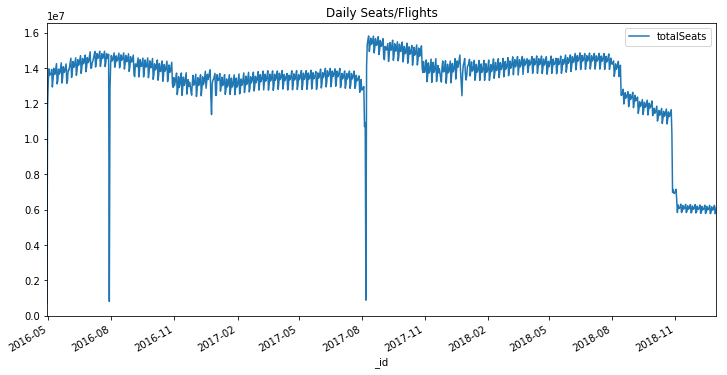

In [70]:
df[df._id < pd.Timestamp("2019-1-1")].plot(
    x="_id",
    y="totalSeats",
    kind="line",
    title="Daily Seats",
    figsize=(12, 6))

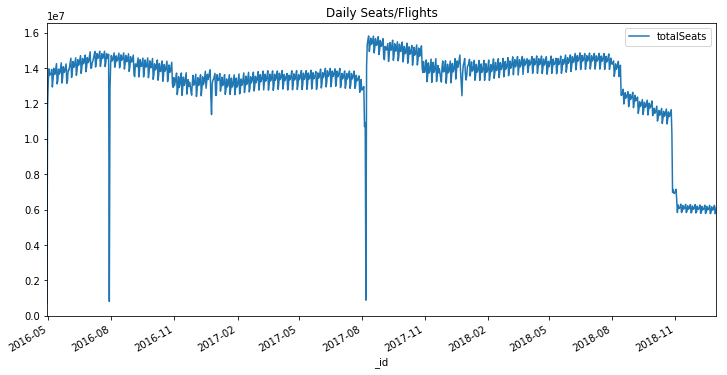

In [61]:
df.plot(
    x="_id",
    y="totalFlights",
    kind="line",
    title="Daily Flights",
    figsize=(12, 6))